In [ ]:
# 1) 

Le CAC 40 est le principal indice boursier de la Bourse de Paris.

In [1]:
# 2)
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
dsCAC40 = pd.read_csv('CAC40.csv');
dsCAC40.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97648 entries, 0 to 97647
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     97648 non-null  int64  
 1   Name           97648 non-null  object 
 2   Date           97648 non-null  object 
 3   Open           97418 non-null  float64
 4   Closing_Price  97646 non-null  float64
 5   Daily_High     97444 non-null  float64
 6   Daily_Low      97444 non-null  float64
 7   Volume         77195 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 6.0+ MB


In [ ]:
# 3)

In [116]:
dsCAC40
dsCAC40['Name'].unique()

array(['Accor', 'Air Liquide', 'Airbus ', 'ArcelorMittal', 'Atos', 'AXA',
       'BNP Paribas', 'Bouygues', 'Cap Gemini', 'Crédit Agricole',
       'Danone', 'Dassault Systèmes', 'Engie (ex GDF Suez',
       'EssilorLuxottica', 'Hermès (Hermes International', 'Kering',
       'LEGRAND', 'LOréal', 'LVMH Moet Hennessy Louis Vuitton',
       'Michelin (Compagnie Générale d Etablissements Michelin SCPA',
       'Orange', 'Pernod Ricard', 'Peugeot', 'Publicis', 'Renault',
       'SAFRAN', 'Saint-Gobain', 'Sanofi', 'Schneider Electric',
       'Société Générale (Societe Generale', 'Sodexo',
       'STMicroelectronics', 'TOTAL', 'Unibail-Rodamco',
       'Veolia Environnement', 'VINCI', 'Vivendi', 'Worldline SA'],
      dtype=object)

Dans ce dataset on peut apercevoir le cours de actions de chaqueb

array(['Orange'], dtype=object)

In [9]:
# 4)
# Orange

In [115]:
dsOrange = dsCAC40[dsCAC40['Name']=="Orange"]
dsOrange

,Unnamed: 0,Name,Date,Open,Closing_Price,Daily_High,Daily_Low,Volume
51994,51994,Orange,2020-04-02,11.01,10.71,11.01,10.71,200
51995,51995,Orange,2020-04-01,10.78,10.91,11.01,10.78,"3,442"
51996,51996,Orange,2020-03-31,11.27,11.03,11.32,11.03,"2,415"
51997,51997,Orange,2020-03-30,11.06,11.27,11.27,10.92,"12,963"
51998,51998,Orange,2020-03-27,11.22,10.99,11.22,10.73,"5,696"
...,...,...,...,...,...,...,...,...
54589,54589,Orange,2010-01-08,17.55,17.32,17.55,17.27,"8,518"
54590,54590,Orange,2010-01-07,17.60,17.50,17.60,17.37,"6,611"
54591,54591,Orange,2010-01-06,17.80,17.61,17.80,17.61,"5,125"
54592,54592,Orange,2010-01-05,17.75,17.77,17.77,17.67,"17,268"


Text(0, 0.5, 'Open')

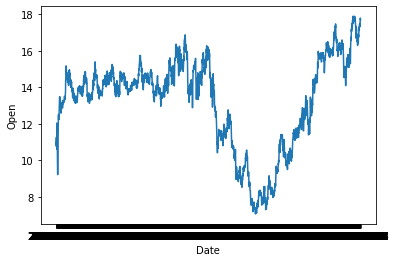

In [23]:
x = dsOrange['Date']
y = dsOrange['Open']
plt.plot(x, y)
plt.xlabel('Date')
plt.ylabel('Open')

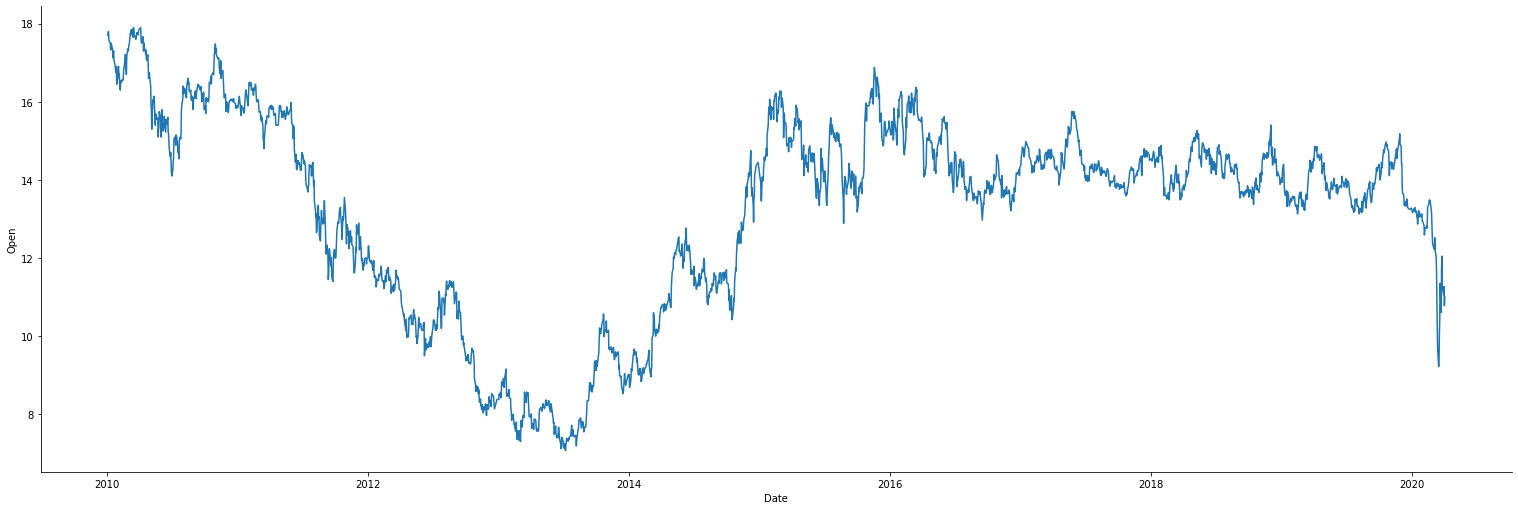

In [31]:
dsOrange['Date'] = pd.to_datetime(dsOrange['Date'])
sns.relplot(x="Date", y="Open", data = dsOrange, height=7,aspect=3, kind="line");

In [ ]:
# 5)

On peut observer une baise des ouverture entre 2010 et 2014 pour ensuite une augmentation jusqu'en 2016 et une stabilisation aux alentours de 16 ouvertures jusqu'en 2020 et une petite baise en 2020

In [42]:
# 6)
nbTot = len(dsOrange.index)
print("nbTot: ", nbTot )

nbTot:  2600


In [117]:
nbCountOpen = len(dsOrange[dsOrange["Volume"] != "" ])
resPourcentage = nbCountOpen * 100 / nbTot
print("res: ", resPourcentage)
dsOrange.describe()
dsOrange.isna().sum()

res:  100.0


Unnamed: 0        0
Name              0
Date              0
Open              0
Closing_Price     0
Daily_High        0
Daily_Low         0
Volume           21
dtype: int64

In [108]:
# 7)

pour récupérer le données manquante j'ai utilisé une condition pour savoir si une colonne a des 

In [53]:
# 8)
dsOrange.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2600 entries, 51994 to 54593
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     2600 non-null   int64         
 1   Name           2600 non-null   object        
 2   Date           2600 non-null   datetime64[ns]
 3   Open           2600 non-null   float64       
 4   Closing_Price  2600 non-null   float64       
 5   Daily_High     2600 non-null   float64       
 6   Daily_Low      2600 non-null   float64       
 7   Volume         2579 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 182.8+ KB


/home/cody/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Date', ylabel='Volume'>

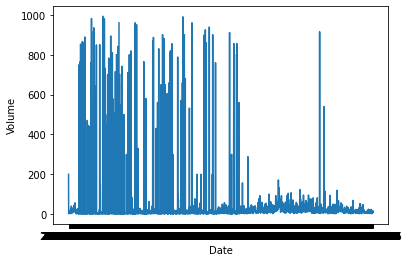

In [106]:
dsOrange['Volume'] = dsOrange.Volume.dropna()
sns.lineplot(dsOrange['Date'], dsOrange['Volume'] )

# dsOrangeMounth = dsOrange.resample('M', on='Date')
# ds

In [ ]:
# 12)

In [99]:
dsOrange = dsCAC40[dsCAC40['Name']=="Orange"]
dsOrange['Date']=pd.to_datetime(dsOrange['Date'],format='%Y%m')

sns.relplot(x="Date", y="Closing_Price", data = dsOrange, height=7,aspect=3, kind="line");


ValueError: time data '2020-04-02' does not match format '%Y%m' (match)